### **CC57 - MACHINE LEARNING - PREPROCESAMIENTO DE DATOS**

#### **Información del Conjunto de Datos**

**Origen:** https://www.kaggle.com/datasets/camnugent/california-housing-prices

**Descripción:**

Los datos pertenecen a las casas encontradas en un distrito determinado de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990.

El conjunto de datos contiene 20640 observaciones en 10 caracteristicas.

**Caracteristicas:**

1. longitude - longitud

2. latitude - latitud

3. housing_median_age - edad_mediana_vivienda

4. total_rooms - total_habitaciones

5. total_bedrooms - total_dormitorios

6. population - población

7. households - hogares

8. median_income - ingreso medio

9. median_house_value - valor_casa_mediana

10. ocean_proximity - proximidad_oceánica (cercana al mar)

#### **Transformación de datos:** Tecnica de Analisis de Componentes Principales (PCA)

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [27]:
train = pd.read_csv("housing.csv")
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [28]:
train.shape

(20640, 10)

In [29]:
#Preprocesamiento express de los datos

# Eliminamos los NA de los datos, que a sklearn no le gustan
train.dropna(inplace=True)
# Eliminamos la variable ocean_proximity o bien la convertimos a 1 o 0 (cerca o no del mar)
train = train.drop('ocean_proximity', axis=1)
# Separamos nuestro target de los datos
x = train.drop(columns='median_house_value')
target = train['median_house_value']
# Normalizamos las variables para que todas esten en la misma escala
x = StandardScaler().fit_transform(x)

In [30]:
#El dataset quedo asi
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [31]:
#Luego de preprocesamiento
train.shape

(20433, 9)

In [32]:
#Nuestro arreglo numpy normalizado a partir de los datos del dataset en df

x

array([[-1.32731375,  1.05171726,  0.98216331, ..., -0.97331952,
        -0.97683327,  2.34516291],
       [-1.32232256,  1.04235526, -0.60621017, ...,  0.86133924,
         1.67037262,  2.33263161],
       [-1.33230494,  1.03767426,  1.85576873, ..., -0.81976943,
        -0.84342665,  1.78293943],
       ...,
       [-0.82320322,  1.77727236, -0.92388486, ..., -0.36882637,
        -0.17377773, -1.14317103],
       [-0.87311515,  1.77727236, -0.84446619, ..., -0.60356386,
        -0.39350628, -1.05513604],
       [-0.83318561,  1.74918635, -1.00330353, ..., -0.03348711,
         0.07995643, -0.78060586]])

In [33]:
#Ejecutamos el PCA

# Creamos el objeto de PCA, indicando cuantos componentes queremos considerar
pca = PCA(n_components=2)
# Entrenamos el PCA con nuestros datos, y lo aplicamos a los datos
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
# Resultados
principalDf.head()

,principal component 1,principal component 2
0,-2.091848,1.395074
1,2.936717,1.934054
2,-1.968320,1.464482
3,-1.917650,1.505893
4,-1.775537,1.564319


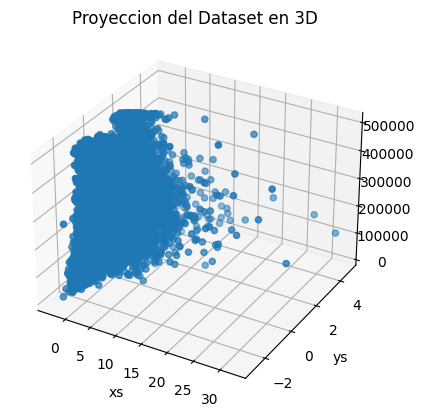

In [34]:
#Como ahora tenemos los datos en 3 dimensiones (2 variables y 1 target) ahora si que podemos ver de manera visual cómo
#están distribuidos nuestros datos

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = principalDf.iloc[:,0]
ys = principalDf.iloc[:,1]
zs = target

plt.xlabel('xs')
plt.ylabel('ys')

plt.title("Proyeccion del Dataset en 3D")
ax.scatter(xs=xs, ys=ys, zs=zs)

Como observamos que el target está muy concentrado, se debe posiblemente porque hemos reducido la cantidad de variables, y también porque hemos hecho un reescalado a los datos de entrenamiento.

Vamos a ver cómo se distribuyen los datos si nos quedáramos solo con un componente:

<ipython-input-37-26347330c04f>:13: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot( 'x', 'y', data=df, linestyle='none', marker='o')


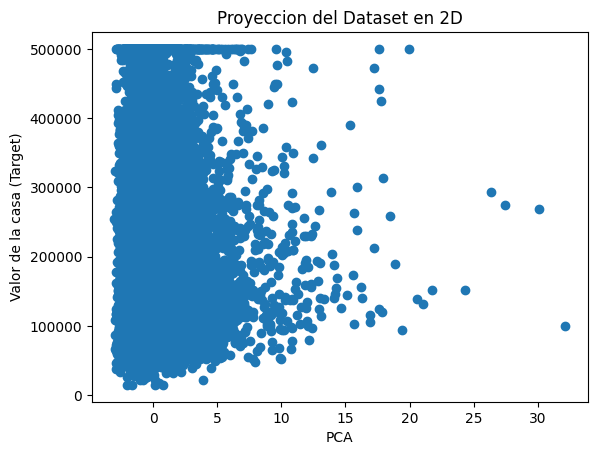

In [37]:
# Visualicemos ahora en una unica dimension
pca = PCA(n_components=1)
# Entrenamos el PCA con nuestros datos, y lo aplicamos a los datos
principalComponents = pca.fit_transform(x)
df = pd.DataFrame()
df['x'] = list(principalComponents)
df['y'] = target
# plot
plt.xlabel('PCA')
plt.ylabel('Valor de la casa (Target)')

plt.title("Proyeccion del Dataset en 2D")
plt.plot( 'x', 'y', data=df, linestyle='none', marker='o')
plt.show()

**Conclusiones**

- Incluir más datos (caracteristicas), por norma general, va a venir muy bien a nuestros modelos, pero es muy posible que aumenten la complejidad del modelo, o incluso incluyamos ruido e incrementemos el tiempo de calculo.
- **PCA** nos ayuda a mantener los componentes que más valor aportan, aunque tenemos que asumir que los datos son linealmente dependientes, y no siempre es así.
- Reducir los datos a dimensiones más pequeñas nos permite poder visualizar la distribución de nuestros datos